In [54]:
import pandas as pd
df = pd.read_csv("Indian_Kids_Screen_Time.csv")

df.head()


,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban
3,15,Female,1.21,Laptop,False,0.39,NaN,Urban
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban


In [55]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9712 entries, 0 to 9711
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                9712 non-null   int64  
 1   Gender                             9712 non-null   object 
 2   Avg_Daily_Screen_Time_hr           9712 non-null   float64
 3   Primary_Device                     9712 non-null   object 
 4   Exceeded_Recommended_Limit         9712 non-null   bool   
 5   Educational_to_Recreational_Ratio  9712 non-null   float64
 6   Health_Impacts                     6494 non-null   object 
 7   Urban_or_Rural                     9712 non-null   object 
dtypes: bool(1), float64(2), int64(1), object(4)
memory usage: 540.7+ KB


In [56]:
df.isnull().sum()


Age                                     0
Gender                                  0
Avg_Daily_Screen_Time_hr                0
Primary_Device                          0
Exceeded_Recommended_Limit              0
Educational_to_Recreational_Ratio       0
Health_Impacts                       3218
Urban_or_Rural                          0
dtype: int64

In [57]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
df.head()


,age,gender,avg_daily_screen_time_hr,primary_device,exceeded_recommended_limit,educational_to_recreational_ratio,health_impacts,urban_or_rural
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban
3,15,Female,1.21,Laptop,False,0.39,NaN,Urban
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban


In [58]:
df.shape


(9712, 8)

In [59]:
df['health_impacts'].isnull().sum()


3218

In [60]:
(3218 / 9712) * 100


33.134266886326195

In [61]:
df['health_impacts'].value_counts()


health_impacts
Poor Sleep                                       2268
Poor Sleep, Eye Strain                            979
Eye Strain                                        644
Poor Sleep, Anxiety                               608
Poor Sleep, Obesity Risk                          452
Anxiety                                           385
Poor Sleep, Eye Strain, Anxiety                   258
Obesity Risk                                      252
Poor Sleep, Eye Strain, Obesity Risk              188
Eye Strain, Anxiety                               135
Eye Strain, Obesity Risk                          106
Poor Sleep, Anxiety, Obesity Risk                  78
Anxiety, Obesity Risk                              69
Poor Sleep, Eye Strain, Anxiety, Obesity Risk      37
Eye Strain, Anxiety, Obesity Risk                  35
Name: count, dtype: int64

In [62]:
df['health_impacts'] = df['health_impacts'].fillna("No Reported Issue")


In [63]:
df['health_impacts'].isnull().sum()


0

In [64]:
df.duplicated().sum()


44

In [65]:
df = df.drop_duplicates()


In [66]:
df.duplicated().sum()


0

In [67]:
df['avg_daily_screen_time_hr'].describe()

count    9668.000000
mean        4.367780
std         1.703002
min         0.000000
25%         3.427500
50%         4.440000
75%         5.380000
max        13.890000
Name: avg_daily_screen_time_hr, dtype: float64

In [68]:
df['gender'].value_counts()


gender
Male      4928
Female    4740
Name: count, dtype: int64

In [69]:
df['urban_or_rural'].value_counts()

urban_or_rural
Urban    6810
Rural    2858
Name: count, dtype: int64

In [70]:
df['primary_device'].value_counts()

primary_device
Smartphone    4540
TV            2478
Laptop        1431
Tablet        1219
Name: count, dtype: int64

In [71]:
df['age'].describe()

count    9668.000000
mean       12.992760
std         3.158931
min         8.000000
25%        10.000000
50%        13.000000
75%        16.000000
max        18.000000
Name: age, dtype: float64

In [72]:
df.groupby('health_impacts')['avg_daily_screen_time_hr'].mean().sort_values(ascending=False)

health_impacts
Eye Strain, Anxiety                              5.081185
Poor Sleep, Anxiety, Obesity Risk                5.060641
Poor Sleep, Obesity Risk                         5.015376
Eye Strain, Anxiety, Obesity Risk                4.993429
Poor Sleep                                       4.956983
Eye Strain, Obesity Risk                         4.949811
Poor Sleep, Eye Strain, Anxiety                  4.911667
Obesity Risk                                     4.911151
Poor Sleep, Anxiety                              4.907084
Anxiety                                          4.903403
Poor Sleep, Eye Strain                           4.882086
Poor Sleep, Eye Strain, Obesity Risk             4.818617
Eye Strain                                       4.809301
Anxiety, Obesity Risk                            4.648841
Poor Sleep, Eye Strain, Anxiety, Obesity Risk    4.548378
No Reported Issue                                3.245264
Name: avg_daily_screen_time_hr, dtype: float64

In [73]:
pd.crosstab(df['exceeded_recommended_limit'], df['health_impacts'])

health_impacts,Anxiety,"Anxiety, Obesity Risk",Eye Strain,"Eye Strain, Anxiety","Eye Strain, Anxiety, Obesity Risk","Eye Strain, Obesity Risk",No Reported Issue,Obesity Risk,Poor Sleep,"Poor Sleep, Anxiety","Poor Sleep, Anxiety, Obesity Risk","Poor Sleep, Eye Strain","Poor Sleep, Eye Strain, Anxiety","Poor Sleep, Eye Strain, Anxiety, Obesity Risk","Poor Sleep, Eye Strain, Obesity Risk","Poor Sleep, Obesity Risk"
exceeded_recommended_limit,,,,,,,,,,,,,,,,
False,0,0,0,0,0,0,1376,0,0,0,0,0,0,0,0,0
True,385,69,644,135,35,106,1804,252,2264,607,78,978,258,37,188,452


In [74]:
df.groupby('exceeded_recommended_limit')['avg_daily_screen_time_hr'].mean()

exceeded_recommended_limit
False    1.617892
True     4.824105
Name: avg_daily_screen_time_hr, dtype: float64

In [75]:
df.groupby('age')['avg_daily_screen_time_hr'].mean().sort_index()

age
8     4.034711
9     3.972046
10    3.912665
11    4.501541
12    4.554348
13    4.500967
14    4.514346
15    4.441725
16    4.551636
17    4.554989
18    4.502217
Name: avg_daily_screen_time_hr, dtype: float64

In [76]:
df.groupby('urban_or_rural')['avg_daily_screen_time_hr'].mean()


urban_or_rural
Rural    4.375640
Urban    4.364482
Name: avg_daily_screen_time_hr, dtype: float64

In [77]:
df.groupby('primary_device')['avg_daily_screen_time_hr'].mean().sort_values(ascending=False)

primary_device
Laptop        4.458784
Smartphone    4.410154
TV            4.299544
Tablet        4.241846
Name: avg_daily_screen_time_hr, dtype: float64

In [78]:
df.groupby('gender')['avg_daily_screen_time_hr'].mean()

gender
Female    4.348614
Male      4.386216
Name: avg_daily_screen_time_hr, dtype: float64

In [79]:
pd.crosstab(df['gender'], df['health_impacts'])


health_impacts,Anxiety,"Anxiety, Obesity Risk",Eye Strain,"Eye Strain, Anxiety","Eye Strain, Anxiety, Obesity Risk","Eye Strain, Obesity Risk",No Reported Issue,Obesity Risk,Poor Sleep,"Poor Sleep, Anxiety","Poor Sleep, Anxiety, Obesity Risk","Poor Sleep, Eye Strain","Poor Sleep, Eye Strain, Anxiety","Poor Sleep, Eye Strain, Anxiety, Obesity Risk","Poor Sleep, Eye Strain, Obesity Risk","Poor Sleep, Obesity Risk"
gender,,,,,,,,,,,,,,,,
Female,186,35,324,68,16,53,1592,103,1114,293,45,480,119,20,83,209
Male,199,34,320,67,19,53,1588,149,1150,314,33,498,139,17,105,243


In [81]:
df['has_health_issue'] = df['health_impacts'].apply(
    lambda x: 'No' if x == 'No Reported Issue' else 'Yes'
)

In [82]:
df['has_health_issue'].value_counts()


has_health_issue
Yes    6488
No     3180
Name: count, dtype: int64

In [83]:
df['has_health_issue'].value_counts(normalize=True) * 100


has_health_issue
Yes    67.107985
No     32.892015
Name: proportion, dtype: float64

In [84]:
pd.crosstab(
    df['exceeded_recommended_limit'],
    df['has_health_issue'],
    normalize='index'
) * 100


has_health_issue,No,Yes
exceeded_recommended_limit,,
False,100.000000,0.000000
True,21.755909,78.244091


In [85]:
df.groupby('has_health_issue')['educational_to_recreational_ratio'].mean()

has_health_issue
No     0.441311
Yes    0.420028
Name: educational_to_recreational_ratio, dtype: float64

In [86]:
df[['avg_daily_screen_time_hr', 'educational_to_recreational_ratio']].corr()

,avg_daily_screen_time_hr,educational_to_recreational_ratio
avg_daily_screen_time_hr,1.000000,-0.081445
educational_to_recreational_ratio,-0.081445,1.000000


In [87]:
bins = [7, 10, 13, 16, 18]
labels = ['8-10', '11-13', '14-16', '17-18']

df.loc[:, 'age_band'] = pd.cut(df['age'], bins=bins, labels=labels)

df['age_band'].value_counts()

age_band
11-13    2640
8-10     2638
14-16    2633
17-18    1757
Name: count, dtype: int64

In [88]:
pd.crosstab(
    df['age_band'],
    df['has_health_issue'],
    normalize='index'
) * 100

has_health_issue,No,Yes
age_band,,
8-10,49.620925,50.379075
11-13,26.022727,73.977273
14-16,27.003418,72.996582
17-18,26.920888,73.079112


In [89]:
pd.crosstab(
    df['age_band'],
    df['exceeded_recommended_limit'],
    normalize='index'
) * 100

exceeded_recommended_limit,False,True
age_band,,
8-10,25.360121,74.639879
11-13,10.151515,89.848485
14-16,9.798709,90.201291
17-18,10.301651,89.698349


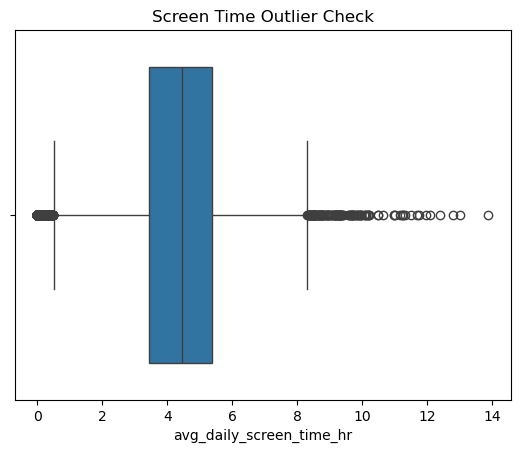

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure()
sns.boxplot(x=df['avg_daily_screen_time_hr'])
plt.title("Screen Time Outlier Check")
plt.show()


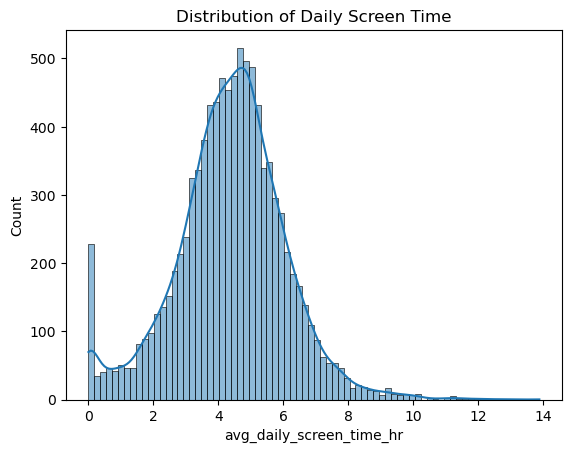

In [91]:
plt.figure()
sns.histplot(df['avg_daily_screen_time_hr'], kde=True)
plt.title("Distribution of Daily Screen Time")
plt.show()


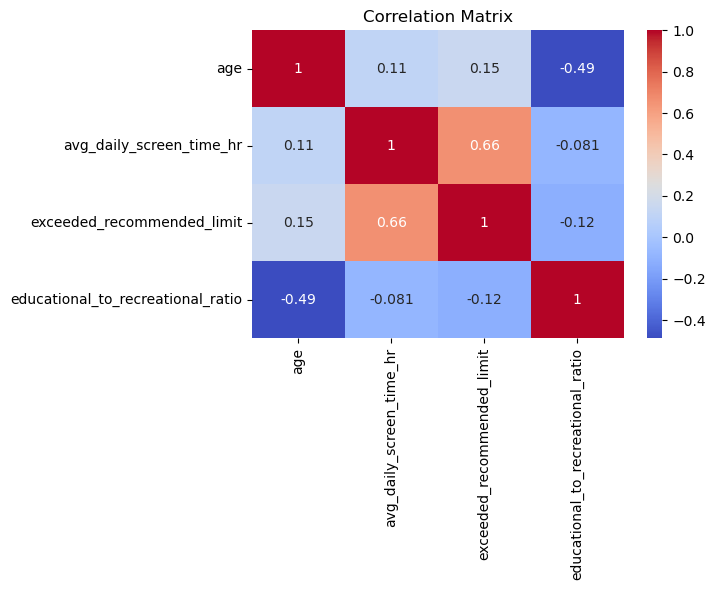

In [40]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [92]:
df.to_csv("screentime_cleaned.csv", index=False)